# **Task 2: Clustering**

#### N.B **Preprocessed Data from Task 1 was Used.**


___
### 1. Load Dataset

In [9]:
# Import the pandas library for data handling
import pandas as pd

# Define a function to load and preprocess the dataset
def load_preprocessed_data(filepath):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(filepath)
    
    # Select all feature columns by excluding the target labels
    feature_cols = [col for col in df.columns if col not in ['species', 'species_encoded']]
    
    # Extract features (X) and true labels (y)
    X = df[feature_cols]
    y_true = df['species_encoded']
    
    # Return the full DataFrame, feature matrix, and target vector
    return df, X, y_true

# Load the dataset from the given path and separate features and target labels
df, X, y_true = load_preprocessed_data('C:\\Users\\Admin\\Desktop\\iris_preprocessed.csv')

#### *Explanation:*  
Load the preprocessed Iris dataset from CSV and separate it into features (`X`) and true labels (`y_true`) for clustering.
___


### 2. K-Means Clustering with ARI Evaluation

In [10]:
# Import necessary libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Define a function to perform KMeans clustering and evaluate it
def kmeans_clustering_evaluate(X, y_true, k=3):
    # Initialize KMeans with specified number of clusters and random seed
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the feature data
    kmeans.fit(X)
    
    # Get the cluster labels assigned by KMeans
    clusters = kmeans.labels_
    
    # Evaluate clustering using Adjusted Rand Index (compares predicted clusters with true labels)
    ari = adjusted_rand_score(y_true, clusters)
    
    # Return the cluster labels, ARI score, and the fitted KMeans model
    return clusters, ari, kmeans 

# Perform KMeans clustering on the data and evaluate with ARI
clusters, ari, kmeans_model = kmeans_clustering_evaluate(X, y_true, k=3)

# Print the ARI score with 4 decimal places
print(f"Adjusted Rand Index (ARI) for k=3: {ari:.4f}")


Adjusted Rand Index (ARI) for k=3: 0.7163


#### *Explanation:*  
Apply K-Means clustering with `k=3` clusters (matching the three species). Compute predicted clusters and evaluate clustering performance using the **Adjusted Rand Index (ARI)**.
___

### 3. Elbow Curve for Optimal k

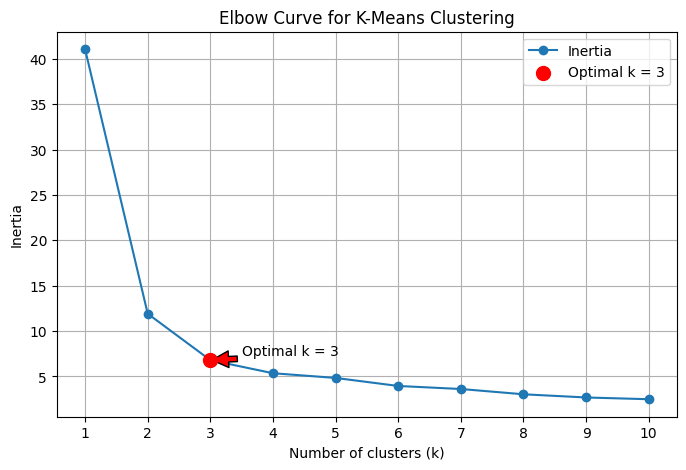

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a function to plot the Elbow Curve with optional highlighting
def plot_elbow_curve(X, max_k=10, optimal_k=None):
    """
    Plots the Elbow Curve to help determine the optimal number of clusters (k) for KMeans.
    
    Parameters:
    - X: Feature dataset
    - max_k: Maximum number of clusters to try (default is 10)
    - optimal_k: Optional, the optimal number of clusters to highlight on the plot
    """
    inertia_list = []

    for k in range(1, max_k + 1):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X)
        inertia_list.append(km.inertia_)
    
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k + 1), inertia_list, marker='o', label='Inertia')
    
    # Highlight the optimal k if provided
    if optimal_k is not None and 1 <= optimal_k <= max_k:
        plt.scatter(optimal_k, inertia_list[optimal_k-1], color='red', s=100, zorder=5, label=f'Optimal k = {optimal_k}')
        plt.annotate(f'Optimal k = {optimal_k}', 
                     xy=(optimal_k, inertia_list[optimal_k-1]), 
                     xytext=(optimal_k+0.5, inertia_list[optimal_k-1]+0.5),
                     arrowprops=dict(facecolor='red', shrink=0.05))
    
    plt.title('Elbow Curve for K-Means Clustering')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage: highlight k=3 as optimal
plot_elbow_curve(X, max_k=10, optimal_k=3)


#### *Explanation:*  
Compute K-Means inertia for multiple values of `k` and plot the **elbow curve** to help identify the optimal number of clusters.

---

### 4. Visualize Clusters

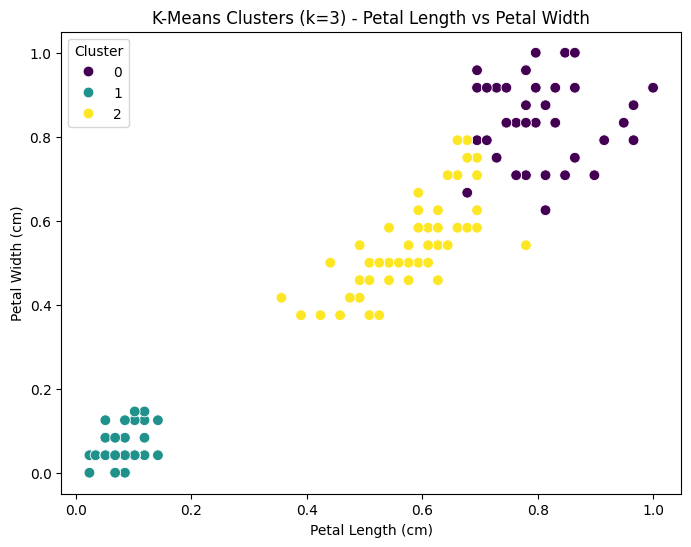

In [12]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot KMeans clustering results
def plot_clusters_scatter(X, clusters):
    """
    Plots the clustering results using a scatter plot of petal length vs petal width.

    Parameters:
    - X: Feature dataset (must include 'petal length (cm)' and 'petal width (cm)')
    - clusters: Cluster labels assigned to each data point
    """
    # Set the figure size
    plt.figure(figsize=(8,6))

    # Create a scatter plot with seaborn, colored by cluster
    sns.scatterplot(
        x=X['petal length (cm)'],
        y=X['petal width (cm)'],
        hue=clusters,          # Color by cluster
        palette='viridis',     # Color palette
        s=60,                  # Marker size
        legend='full'          # Full legend
    )

    # Add plot title and axis labels
    plt.title('K-Means Clusters (k=3) - Petal Length vs Petal Width')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend(title='Cluster')  # Legend title
    plt.show()

# Call the function to visualize the clusters
plot_clusters_scatter(X, clusters)


#### *Explanation:*  
Visualize the clusters in a scatter plot of **Petal Length vs Petal Width**, coloring points by cluster assignment.
___

### 5.Analysis of Clustering Results

#### Adjusted Rand Index (ARI)

In [13]:
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.7163


#### *Explanation:*  
The ARI measures the similarity between the clustering result and the true species labels, adjusting for chance. An ARI of **0.7163** indicates a good but not perfect match. Some species are well-separated while others have overlaps, meaning K-Means captured the main structure but misclassifications exist.

---

### Points per Cluster

In [14]:
# Import pandas for data manipulation
import pandas as pd

# Count how many data points are assigned to each cluster
cluster_counts = pd.Series(clusters).value_counts()

# Print the number of points in each cluster
print("Points per cluster:\n", cluster_counts)


Points per cluster:
 2    61
1    50
0    39
Name: count, dtype: int64


#### *Explanation:*  
The number of points in each cluster is:  
- Cluster 0 → 39 points  
- Cluster 1 → 50 points  
- Cluster 2 → 61 points  

This shows clusters are uneven in size, reflecting differences in species distributions. The largest cluster may correspond to a species with higher variance in features.

---

### Contingency Table (True vs Predicted)

In [15]:
# Create a contingency table comparing true labels with cluster assignments
contingency = pd.crosstab(y_true, clusters, rownames=['True'], colnames=['Cluster'])

# Print the contingency table
print(contingency)


Cluster   0   1   2
True               
0         0  50   0
1         3   0  47
2        36   0  14


#### *Explanation:*  
| True | 0  | 1  | 2  |  
|------|----|----|----|  
| 0    | 0  | 50 | 0  |  
| 1    | 3  | 0  | 47 |  
| 2    | 36 | 0  | 14 |  

- Cluster 1 perfectly captured species 0 (Setosa).  
- Species 1 (Versicolor) mostly went to Cluster 2, with 3 misclassified as Cluster 0.  
- Species 2 (Virginica) is split across Clusters 0 and 2, showing significant overlap with Versicolor.  

Misclassifications are mainly due to **feature overlap** between Versicolor and Virginica.

### Cluster Centers 

In [16]:
print("Cluster centers:\n", kmeans_model.cluster_centers_)


Cluster centers:
 [[0.70726496 0.44951923 0.79704476 0.82478632]
 [0.19611111 0.59645833 0.07847458 0.05916667]
 [0.44267987 0.3076332  0.57599333 0.54918033]]


#### *Explanation:*  
The cluster centers (average feature values per cluster):


- Each row represents the average **sepal length, sepal width, petal length, petal width** for that cluster.  
- Cluster 1 clearly corresponds to Setosa (small petal values).  
- Clusters 0 and 2 represent overlapping Versicolor and Virginica, consistent with the ARI and contingency table.

---


### Analysis of Clustering Results Summary
The K-Means clustering on the preprocessed Iris dataset produced an **Adjusted Rand Index (ARI) of 0.7163**, indicating that the clustering captured the main structure of the data but was not perfect. Cluster 1 perfectly identified Setosa, reflecting its distinct feature profile, while Versicolor and Virginica were partially mixed. The contingency table shows misclassifications: three Versicolor samples were assigned to Cluster 0, and Virginica samples were split between Clusters 0 and 2. This misclassification is primarily due to **overlapping feature distributions** between Versicolor and Virginica, which makes these species harder to separate using K-Means.  

The cluster centers reveal that Cluster 1 corresponds to Setosa’s small petal sizes, whereas Clusters 0 and 2 capture overlapping Versicolor and Virginica samples. The uneven cluster sizes highlight differences in species variance. These results reflect typical challenges in real-world applications, such as **customer segmentation**, where distinct groups are clearly separable but borderline cases may require additional features or advanced models.  

Synthetic preprocessing and normalization likely improved clustering performance by scaling all features equally, but it cannot fully resolve intrinsic overlaps in the data, limiting the ARI and contributing to some misclassifications.


### Real-World Implications 
#### *Explanation:*  
K-Means effectively separates well-defined groups (like Setosa) but struggles with overlapping classes (Versicolor vs Virginica). In practice, this mirrors **customer segmentation** or **product categorization** where distinct groups are easy to cluster, but borderline cases may require additional features or more sophisticated models. Synthetic scaling or preprocessing can influence cluster placement and reduce variance effects, but it cannot completely resolve intrinsic overlaps in the data.
